In [13]:

import numpy as np
import tensorflow as tf

%pylab inline


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## At the level of the model

In [14]:

images = tf.random.uniform(
    shape=(5,51,51,1), minval=0, maxval=1, dtype=tf.dtypes.float32, seed=None, name=None
)


In [15]:
def pad(image):
    r"""Convert images to 64x64x1 shaped tensors to feed the model, using zero-padding."""
    pad = tf.constant([[0,0], [6,7],[6,7], [0,0]])
    return tf.pad(image, pad, "CONSTANT")    

def crop(image):
    r"""Crop back the image to its original size and convert it to np.array"""
    return tf.image.crop_to_bounding_box(image, 6, 6, 51, 51)


In [16]:

padded_imgs = pad(images)
padded_imgs.shape

TensorShape([5, 64, 64, 1])

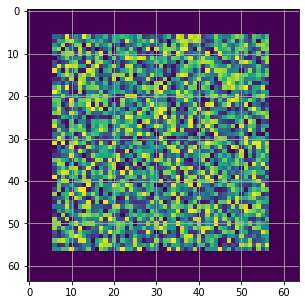

In [20]:

figure(figsize=(5,5))
imshow(padded_imgs.numpy()[0,:,:,0])
grid('minor')


In [22]:

cropped_imgs = crop(padded_imgs)
cropped_imgs.shape

TensorShape([5, 51, 51, 1])

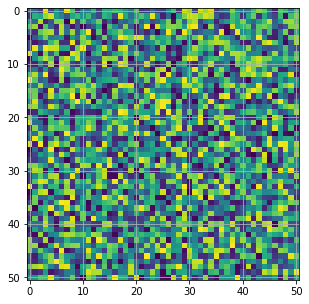

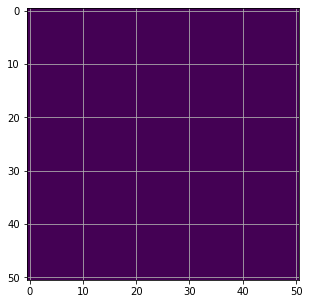

In [24]:
figure(figsize=(5,5))
imshow(cropped_imgs.numpy()[0,:,:,0])
grid('minor')
show()

figure(figsize=(5,5))
imshow(cropped_imgs.numpy()[0,:,:,0] - images.numpy()[0,:,:,0])
grid('minor')
show()


## At the level of the prox operator

In [1]:

def convert_and_pad(image):
    r"""Convert images to 64x64x1 shaped tensors to feed the model, using zero-padding."""
    image = tf.reshape(
        tf.convert_to_tensor(image),
        [np.shape(image)[0], np.shape(image)[1], np.shape(image)[2], 1]
    )
    # pad = tf.constant([[0,0], [6,7],[6,7], [0,0]])
    # return tf.pad(image, pad, "CONSTANT")
    return image

def convert_and_pad_v2(image):
    r""" Convert images to tensorflow's tensor and add an extra 4th dimension."""
    return tf.expand_dims(tf.convert_to_tensor(image), axis=3)


def crop_and_convert(image):
    r"""Crop back the image to its original size and convert it to np.array"""
    #image = tf.reshape(tf.image.crop_to_bounding_box(image, 6, 6, 51, 51), [np.shape(image)[0], 51, 51])
    image = tf.reshape(image, [np.shape(image)[0], 51, 51])
    return image.numpy()

def crop_and_convert_v2(image):
    r"""Convert to numpy array and remove the 4th dimension."""
    return image.numpy()[:,:,:,0]


In [5]:

np.amax(new_imgs, axis=(1,2)).shape


(5,)

In [8]:

new_imgs = np.random.rand(5,51,51)
new_imgs[1,:,:] -= 1
new_imgs.shape


(5, 51, 51)

In [42]:

tf_imgs = convert_and_pad_v2(new_imgs)
tf_imgs.shape


TensorShape([5, 51, 51, 1])

In [43]:

op_imgs = crop_and_convert_v2(tf_imgs)
op_imgs.shape


(5, 51, 51)

In [9]:

multiple = np.array([np.sum(im)>0 for im in new_imgs]) * 2. - 1.
multiple

array([ 1., -1.,  1.,  1.,  1.])

In [10]:

np.sum(new_imgs, axis=(1,2))  * 2. - 1.


array([ 2588.38512294, -2594.82704738,  2570.92288774,  2607.92638573,
        2601.02511708])

In [14]:
tf_new_imgs = tf.convert_to_tensor(new_imgs)


2022-02-20 19:37:26.238653: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-02-20 19:37:26.239044: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
tf_new_imgs /= 0.5

In [24]:
tf_new_imgs

<tf.Tensor: shape=(5, 51, 51), dtype=float64, numpy=
array([[[1.29572203, 1.43397416, 1.33798797, ..., 1.26460589,
         1.56177004, 1.36243259],
        [1.14271488, 1.75656135, 1.86582448, ..., 1.20714166,
         1.22353232, 1.49591382],
        [1.38352301, 1.48866741, 1.10239808, ..., 1.32206607,
         1.17656817, 1.04697674],
        ...,
        [1.96187754, 1.38565764, 1.01216646, ..., 1.10879843,
         1.02333455, 1.27500529],
        [1.12790282, 1.63882475, 1.08108996, ..., 1.76465227,
         1.63088793, 1.05238131],
        [1.45004582, 1.4895326 , 1.11259632, ..., 1.19980758,
         1.74990653, 1.16810252]],

       [[0.9077393 , 0.62950187, 0.11537597, ..., 0.91384236,
         0.87803734, 0.98829801],
        [0.27259389, 0.00602658, 0.36391283, ..., 0.17275137,
         0.24919934, 0.29141256],
        [0.29512473, 0.33658235, 0.1003678 , ..., 0.94445558,
         0.25109898, 0.95779376],
        ...,
        [0.53350566, 0.96200887, 0.33013422, ..., 0.265